In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

In [2]:
# Load the datasets

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [3]:
# Check for missing values in train and test data

df.isnull().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [4]:
df_test.isnull().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64

In [5]:
# Examine the data types of each column in train and test data

df.dtypes

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object

In [6]:
df_test.dtypes

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
dtype: object

In [7]:
# Analyse summary statistics in train and test data

df.describe(percentiles=[0.01, 0.99])

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
1%,3603.350000,1.180000,1.000000,0.000000,0.000000,0.000000,6.190000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.120000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
99%,356731.650000,15.400000,5.000000,5.000000,5.000000,4.000000,21.800000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,148.870000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [8]:
df_test.describe(percentiles=[0.01, 0.99])

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
count,240224.00000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000
mean,480447.50000,6.353813,3.043930,2.454039,0.685381,2.198173,13.828380,0.565747,0.326928,18.959933,28174.648840,0.564173,0.275647,0.504396,0.504429,0.501815
std,69346.83987,3.307402,0.782982,1.487416,1.211368,1.085129,4.623458,0.495660,0.469092,10.216219,5974.494735,0.495866,0.446841,0.499982,0.499981,0.499998
min,360336.00000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,362738.23000,1.180000,1.000000,0.000000,0.000000,0.000000,6.180000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,480447.50000,5.800000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000
99%,598156.77000,15.440000,5.000000,5.000000,5.000000,4.000000,21.800000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,600559.00000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# # Create histogram of the train and test datasets

# df.hist(figsize=(20, 15))
# plt.show()

In [10]:
# df_test.hist(figsize=(20, 15))
# plt.show()

In [11]:
# # Pairplot of entire dataset to observe the correlation between features and also with the target variable

# sns.pairplot(df)
# plt.show()

### OBSERVATIONS

1. No missing values in any of the columns
2. All columns contain numberical values (either floats or ints)
3. Features such store_sales, unit_sales, total_children, num_children_at_home, avg_cars_at_home, gross_weight, units_per_case, store_sqft and target variable cost are continous values while the rest are categorical values
4. id column will probably useless and will be dropped
5. store_sales might contain outliers, but for now I consider the outliers a natural part of the sample data
6. Takes roughly 3m to run the pairplot on my laptop, so comment out after initial analysis
7. Comparing the train and test data, the mean, standard deviations and data distribution of all the features are similar. so the data should be split in train and validation sets to mimic these distributions

In [12]:
# Create bins based on quantiles of the target variables

num_bins = 16
labels = np.arange(1, num_bins+1)
df["cost_bins"] = pd.qcut(df["cost"], q=num_bins, labels=labels)

# Split the training data in train and validation data, maintaining the distribution of the bins
train_train, train_val = train_test_split(df, test_size=0.2, random_state=5, stratify=df["cost_bins"])

# Remove the cost_bins column from the original dataframe
df.drop("cost_bins", axis=1, inplace=True)

In [13]:
# Save the train_train and train_val data to local memory

train_train.to_csv("validation_datas/train.csv", index=False)
train_val.to_csv("validation_datas/val.csv", index=False)

### THE WORK BEGINS!!!

In [14]:
# Load the train and test datasets

train_path = "./train.csv"
test_path = "./test.csv"

df_train = pd.read_csv(train_path)
df_val = pd.read_csv(test_path)

df_train.head()
df.columns

Index(['id', 'store_sales(in millions)', 'unit_sales(in millions)',
       'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1',
       'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

In [15]:
# Feature generation for training

df_train["store_sales_per_sqft"] = df_train["store_sales(in millions)"] / df_train["store_sqft"]
df_train["unit_sales_per_sqft"] = df_train["unit_sales(in millions)"] / df_train["store_sqft"]
df_train["sales_ratio"] = df_train["store_sales(in millions)"] / df_train["unit_sales(in millions)"]
df_train["total_amenities"] = df_train["coffee_bar"] + df_train["video_store"] + df_train["salad_bar"] + df_train["prepared_food"] + df_train["florist"]
df_train["socially_conscious"] = df_train["recyclable_package"] + df_train["low_fat"]

df_train["child_car_ratio"] = df_train["total_children"] / np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"])
df_train["children_diff"] = df_train["total_children"] - df_train["num_children_at_home"]
df_train["avg_sales_per_child"] = df_train["store_sales(in millions)"] / np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"])
df_train["avg_unit_sales_per_child"] = df_train["unit_sales(in millions)"] / np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"])
df_train["avg_store_sqft_per_child"] = df_train["store_sqft"] / np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"])
df_train["avg_cars_per_child_at home"] = df_train["avg_cars_at home(approx).1"] / np.where(df_train["num_children_at_home"] == 0, 1e-6, df_train["num_children_at_home"])

# Interactive features
df_train["store_sqft_total_children"] = df_train["store_sqft"] * np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"])
df_train["store_sqft_avg_cars_at home"] = df_train["store_sqft"] * np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"])
df_train["total_children_avg_cars_at home"] = np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"]) * np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"])
df_train["store_sqft_total_children_avg_cars_at home"] = df_train["store_sqft"] * np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"]) * np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"])

# Polynomial features
df_train["store_sqft_squared"] = df_train["store_sqft"] ** 2
df_train["total_children_squared"] = np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"]) ** 2
df_train["avg_cars_at home_squared"] = np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"]) ** 2
df_train["store_sqft_cubed"] = df_train["store_sqft"] ** 3
df_train["total_children_cubed"] = df_train["total_children"] ** 3
df_train["avg_cars_at home_cubed"] = df_train["avg_cars_at home(approx).1"] ** 3

In [16]:
# Feature generation for training

df_val["store_sales_per_sqft"] = df_val["store_sales(in millions)"] / df_val["store_sqft"]
df_val["unit_sales_per_sqft"] = df_val["unit_sales(in millions)"] / df_val["store_sqft"]
df_val["sales_ratio"] = df_val["store_sales(in millions)"] / df_val["unit_sales(in millions)"]
df_val["total_amenities"] = df_val["coffee_bar"] + df_val["video_store"] + df_val["salad_bar"] + df_val["prepared_food"] + df_val["florist"]
df_val["socially_conscious"] = df_val["recyclable_package"] + df_val["low_fat"]

df_val['child_car_ratio'] = df_val['total_children'] / np.where(df_val['avg_cars_at home(approx).1'] == 0, 1e-6, df_val['avg_cars_at home(approx).1'])
df_val['children_diff'] = df_val['total_children'] - df_val['num_children_at_home']
df_val['avg_sales_per_child'] = df_val['store_sales(in millions)'] / np.where(df_val['total_children'] == 0, 1e-6, df_val["total_children"])
df_val['avg_unit_sales_per_child'] = df_val['unit_sales(in millions)'] / np.where(df_val['total_children'] == 0, 1e-6, df_val["total_children"])
df_val['avg_store_sqft_per_child'] = df_val['store_sqft'] / np.where(df_val['total_children'] == 0, 1e-6, df_val["total_children"])
df_val['avg_cars_per_child_at home'] = df_val['avg_cars_at home(approx).1'] / np.where(df_val['num_children_at_home'] == 0, 1e-6, df_val["num_children_at_home"])

# Interactive features
df_val['store_sqft_total_children'] = df_val['store_sqft'] * np.where(df_val['total_children'] == 0, 1e-6, df_val["total_children"])
df_val['store_sqft_avg_cars_at home'] = df_val['store_sqft'] * np.where(df_val['avg_cars_at home(approx).1'] == 0, 1e-6, df_val['avg_cars_at home(approx).1'])
df_val['total_children_avg_cars_at home'] = np.where(df_val['total_children'] == 0, 1e-6, df_val["total_children"]) * np.where(df_val['avg_cars_at home(approx).1'] == 0, 1e-6, df_val['avg_cars_at home(approx).1'])
df_val['store_sqft_total_children_avg_cars_at home'] = df_val['store_sqft'] * np.where(df_val['total_children'] == 0, 1e-6, df_val["total_children"]) * np.where(df_val['avg_cars_at home(approx).1'] == 0, 1e-6, df_val['avg_cars_at home(approx).1'])

# Polynomial features
df_val['store_sqft_squared'] = df_val['store_sqft'] ** 2
df_val['total_children_squared'] = np.where(df_val['total_children'] == 0, 1e-6, df_val["total_children"]) ** 2
df_val['avg_cars_at home_squared'] = np.where(df_val['avg_cars_at home(approx).1'] == 0, 1e-6, df_val['avg_cars_at home(approx).1']) ** 2
df_val['store_sqft_cubed'] = df_val['store_sqft'] ** 3
df_val['total_children_cubed'] = df_val['total_children'] ** 3
df_val['avg_cars_at home_cubed'] = df_val['avg_cars_at home(approx).1'] ** 3

### GET BASELINE USING XGBOOST, LIGHTGBM AND CATBOOST

In [17]:
# Separate features and target for train and test data
# Code is setup to either use the stratified train-val split data or the original train-test data provided

try:

    X_train = df_train.drop(["id", "cost", "cost_bins"], axis=1)
    y_train = df_train["cost"]

    X_test = df_val.drop(["id", "cost", "cost_bins"], axis=1)
    y_test = df_val["cost"]

except KeyError:
    X_train = df_train.drop(["id", "cost"], axis=1)
    y_train = df_train["cost"]

    X_test = df_val.drop(["id"], axis=1)


In [18]:
# Perform cross-validation and calculate the RMSLE

def evaluate_model(model, X, y, n_splits=5):
    rmsle_scores = []    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=5)

    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        # Clip predictions to avoid negative values
        y_pred = np.clip(y_pred, 1e-6, np.max(y_pred))

        rmsle = np.sqrt(mean_squared_log_error(y_test_cv, y_pred))
        rmsle_scores.append(rmsle)
    
    return rmsle_scores

In [19]:
# Initialize the models

models = {
    "LightGBM": lgb.LGBMRegressor(random_state=5),
    "xGBoost": xgb.XGBRegressor(random_state=5),
    "CatBoost": CatBoostRegressor(silent=True, random_state=5),
}

### OBSERVATIONS - BASELINE AFTER STRATIFYING SPLIT DATA INTO TRAIN AND VALIDATION

1. Baseline LightGBM RMSLE is 0.303294
2. Baseline xGBoost RMSLE is 0.302591
3. Baseline CatBoost RMSLE is 0.302491
4. Baseline Random Forest RMSLE is 0.310002
5. Baseline SGD RMSLE is 28.623026

CatBoost performed the best on baseline data before feature engineering and data pre-processing

6. Plotting feature importance, the most noticeable peaks in the LightGBM model which shows in order of importance store_sqft, total_children, avg_cars_at_home
7. Plotting feature importance, the most noticeable peaks in the xGBoost model which shows in order of importance florist, store_sqft, video_store
8. Plotting feature importance, the most noticeable peaks in the CatBoost model which shows in order of importance store_sqft, total_children, avg_cars_at_home
9. Plotting feature importance, the most noticeable peaks in the Random Forest model which shows in order of importance store_sales, gross_weight, units_per_case
10. SGD Regressor does not have feature importance

Model: LightGBM
RMSLE Scores: [0.30196301373398216, 0.30004383287992425, 0.3012428854772847, 0.3022911784651102, 0.30188370042878787]
Average RMSLE: 0.301485
Std. Deviation: 0.000797

Model: xGBoost
RMSLE Scores: [0.30043065037018535, 0.2984416952044717, 0.29945763614167403, 0.30071665147187887, 0.3005649709113908]
Average RMSLE: 0.299922
Std. Deviation: 0.000861

Model: CatBoost
RMSLE Scores: [0.2998215376041907, 0.29756907173874675, 0.2989584235781457, 0.3001657952879031, 0.30001308725794423]
Average RMSLE: 0.299306
Std. Deviation: 0.000964



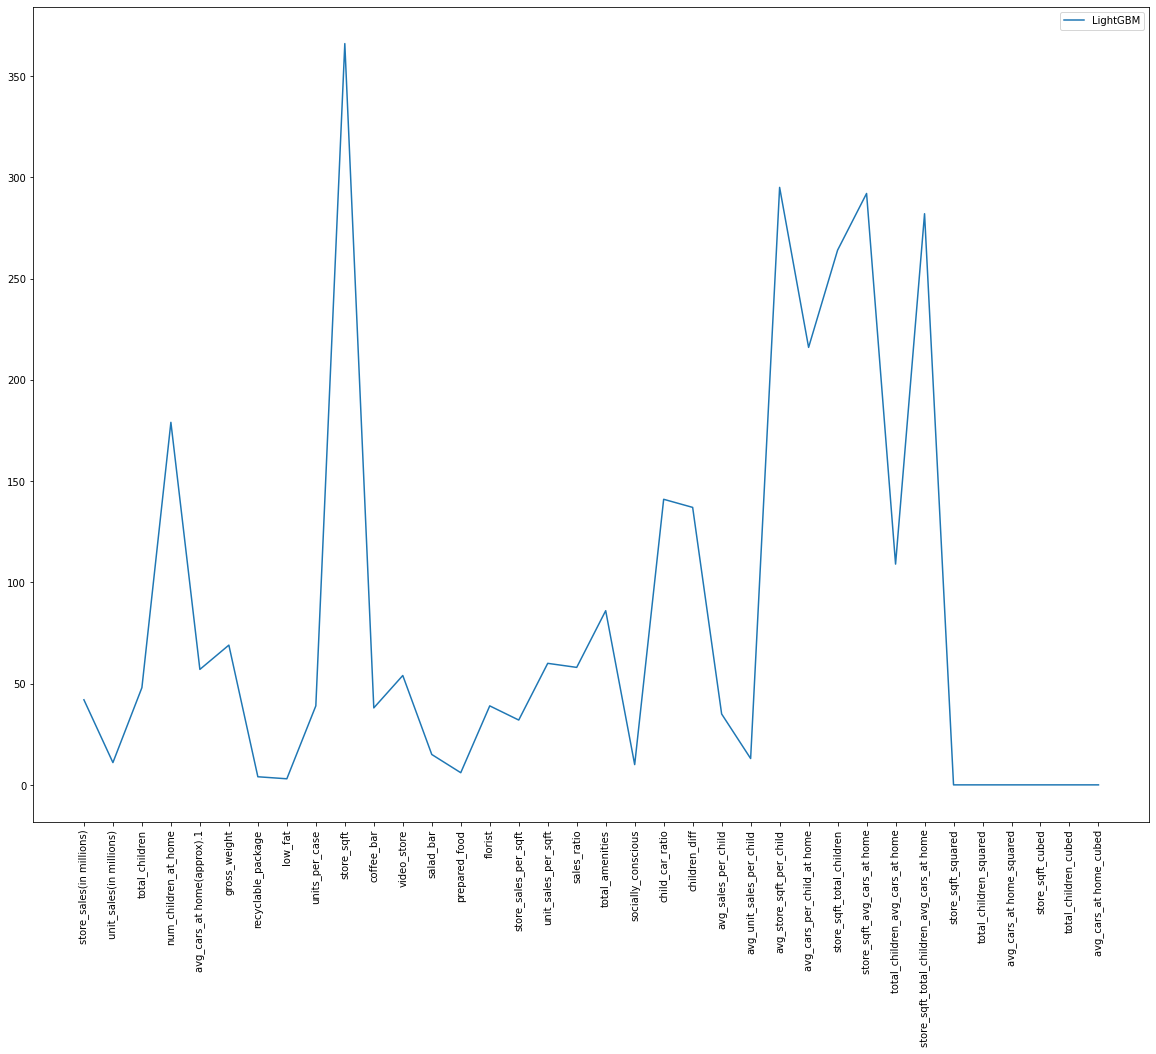

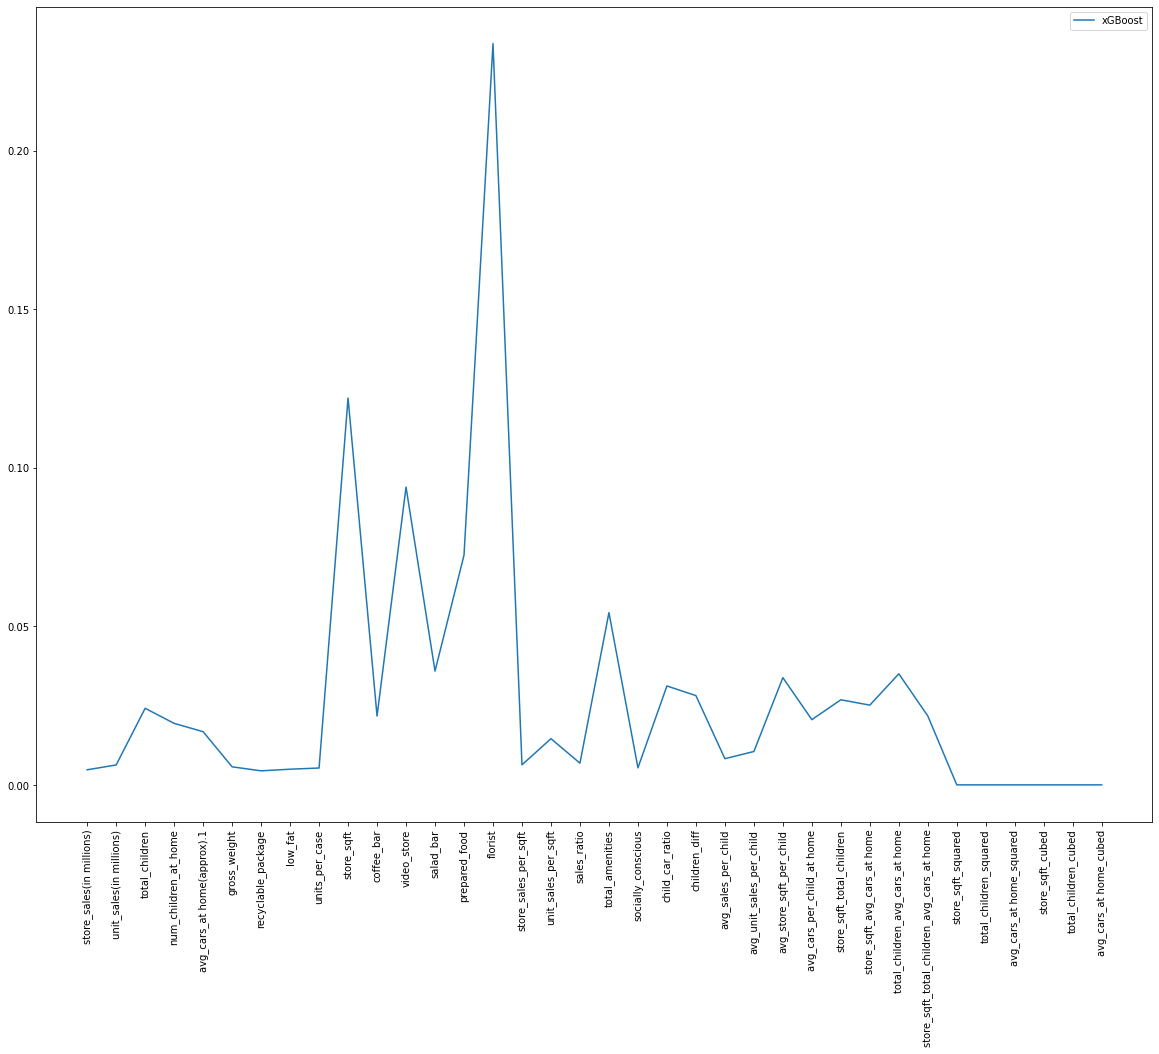

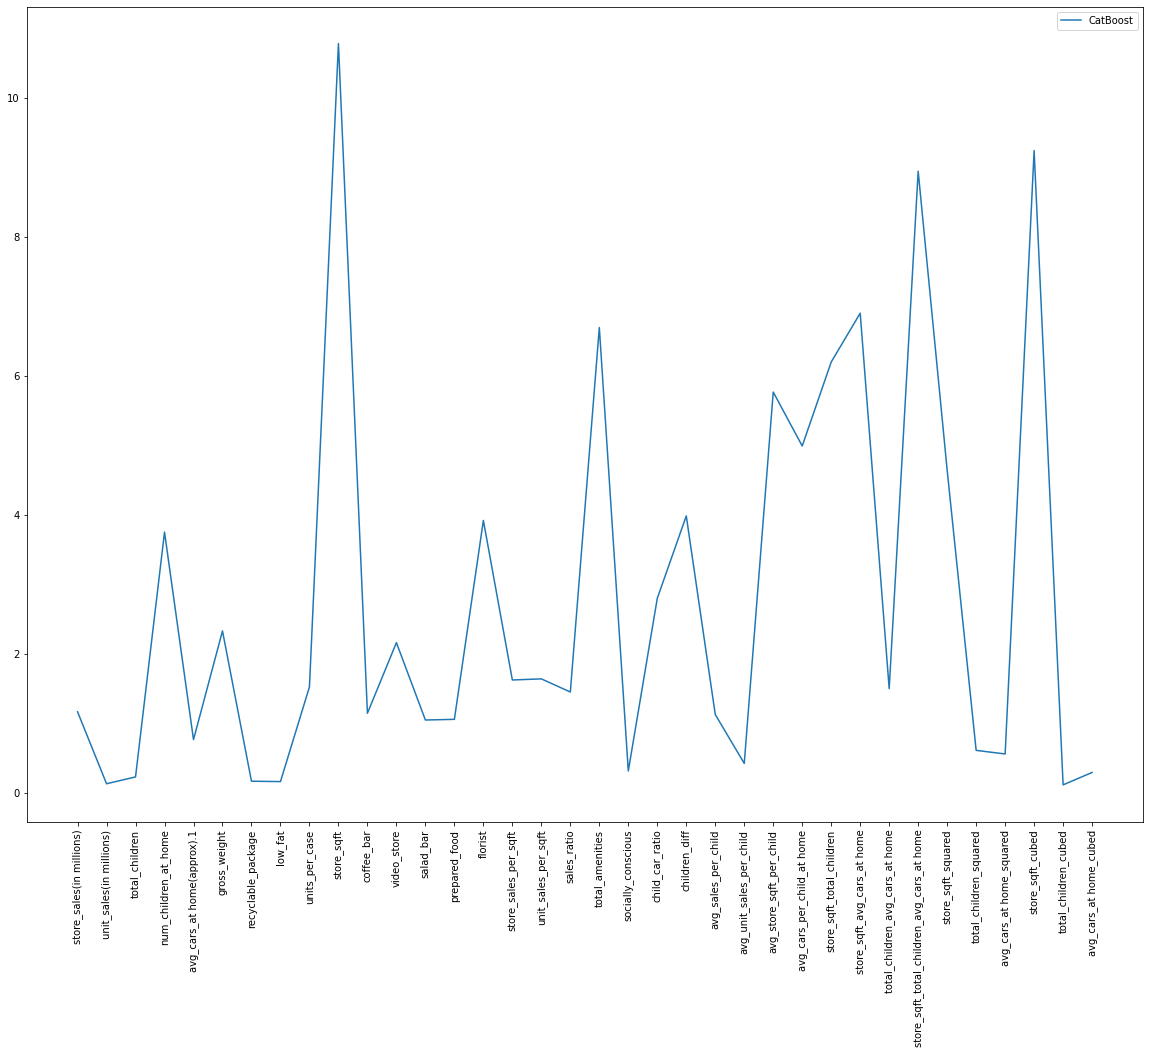

In [20]:
for name, model in models.items():
    rmsle_scores = evaluate_model(model, X_train, y_train)
    mean_rmsle = np.mean(rmsle_scores)
    std = np.std(rmsle_scores)

    print(f"Model: {name}")
    print(f"RMSLE Scores: {rmsle_scores}")
    print(f"Average RMSLE: {mean_rmsle:.6f}")
    print(f"Std. Deviation: {std:.6f}")
    try:
        plt.figure(figsize=(20, 15))
        plt.plot(model.feature_importances_, label=name)
        plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90)
        plt.legend()
    
    except AttributeError: #Incase the model does not have 'feature_importances_'
        pass
    print()

### OBSERVATION - USE TRAIN DATA TO CROSS VALIDATE WITH K-FOLD AND SEE THE RMSLE SCORES PER FOLD AND MEAN RMSLE
### TRYING CV FOR 5 AND 10 FOLDS THEN SETTLING ON EITHER

##### 5 FOLDS
1. LightGBM mean RMSLE is 0.301485, Standard deviation of 0.000797
2. xGBoost mean RMSLE is 0.299922, Standard deviation of 0.000861
3. CatBoost mean RMSLE is 0.299306, Standard deviation of 0.000964

CatBoost performed the best on training data that is cross validated with 5 folds

Run time ~ 5 minutes

Model: LightGBM
RMSLE Scores: [0.3018158640439344, 0.3014926916660678, 0.3000481305237903, 0.2994050658304608, 0.3013176720706284, 0.3004623731500847, 0.30185754721308505, 0.30231954552716067, 0.30187393938896323, 0.3016301892622019]
Average RMSLE: 0.301222
Std. Deviation: 0.000888

Model: xGBoost
RMSLE Scores: [0.3003973149581903, 0.3001169316086842, 0.2983618378900192, 0.2973991609376091, 0.2995988196307458, 0.2990391871125548, 0.3001889826921629, 0.3006213225978801, 0.3002653646560087, 0.3006339826079589]
Average RMSLE: 0.299662
Std. Deviation: 0.001023

Model: CatBoost
RMSLE Scores: [0.2997826380713848, 0.2992631436299546, 0.2978003179095273, 0.29706365723095945, 0.29896516790407845, 0.2987270980555162, 0.2998709187960368, 0.30006361592159575, 0.2995875484961858, 0.2999368585423283]
Average RMSLE: 0.299106
Std. Deviation: 0.000946



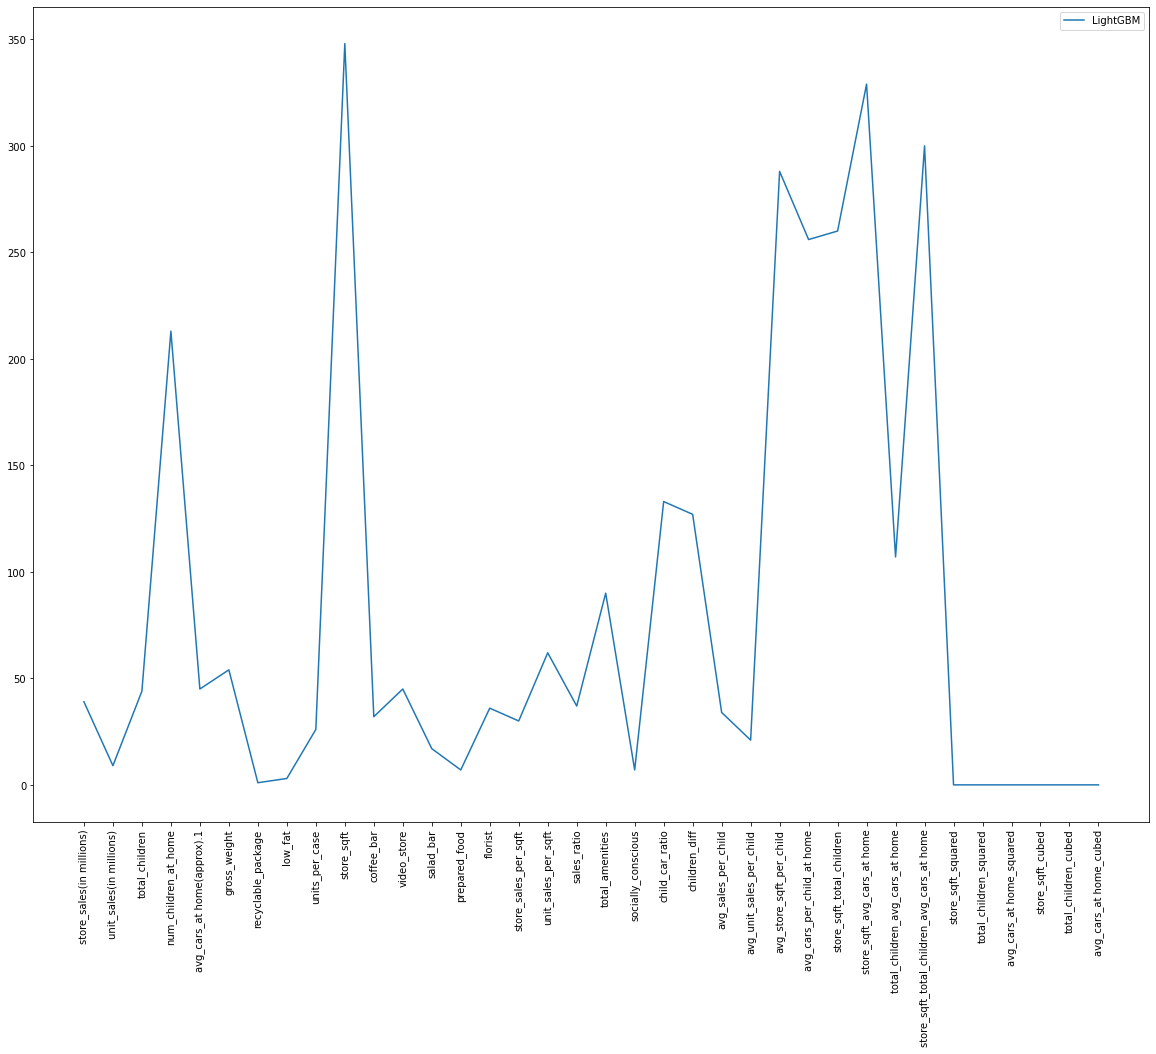

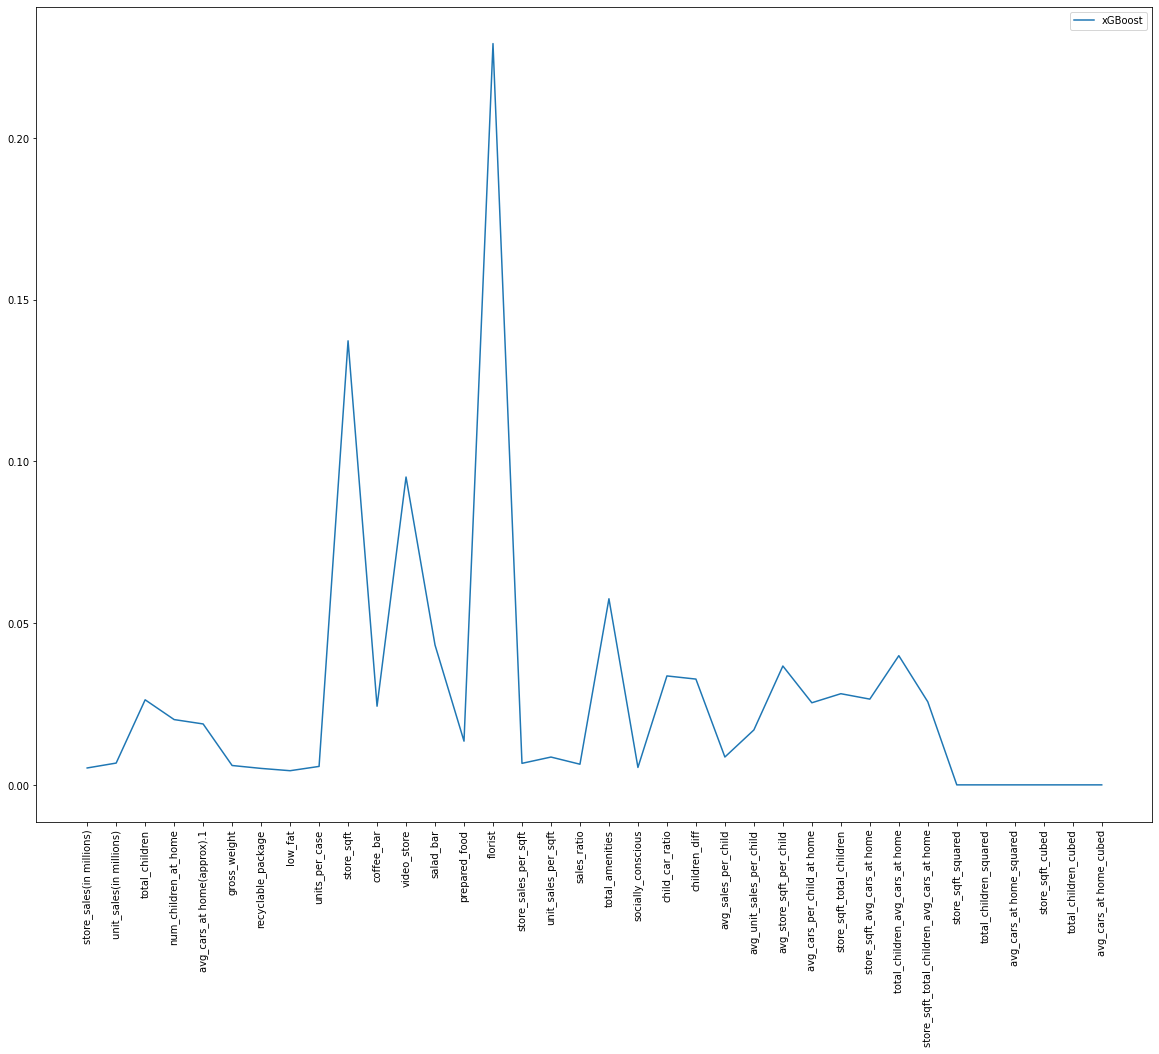

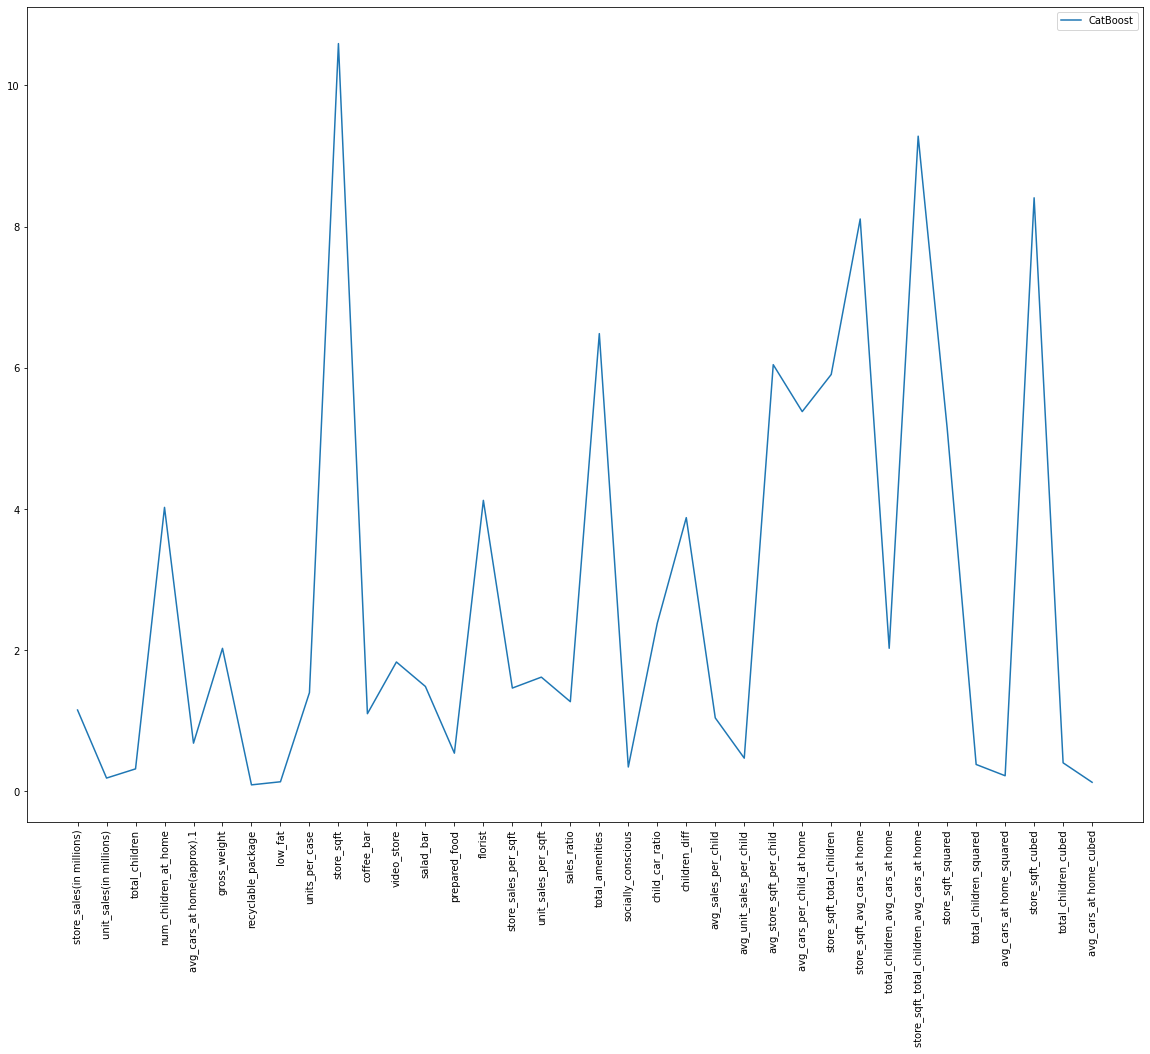

In [21]:
for name, model in models.items():
    rmsle_scores = evaluate_model(model, X_train, y_train, n_splits=10)
    mean_rmsle = np.mean(rmsle_scores)
    std = np.std(rmsle_scores)

    print(f"Model: {name}")
    print(f"RMSLE Scores: {rmsle_scores}")
    print(f"Average RMSLE: {mean_rmsle:.6f}")
    print(f"Std. Deviation: {std:.6f}")
    try:
        plt.figure(figsize=(20, 15))
        plt.plot(model.feature_importances_, label=name)
        plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90)
        plt.legend()
    
    except AttributeError: #Incase the model does not have 'feature_importances_'
        pass
    print()


##### 10 FOLDS
1. LightGBM mean RMSLE is 0.301222, Standard deviation of 0.000878
2. xGBoost mean RMSLE is 0.299662, Standard deviation of 0.001023
3. CatBoost mean RMSLE is 0.299106, Standard deviation of 0.000946

CatBoost performed the best on training data that is cross validated with 10 folds

Run time ~ 11 minutes

# PREDICTION STATION

In [22]:
cat = CatBoostRegressor(silent=True, random_state=5)

cat.fit(X_train, y_train)

In [23]:
# Predict the final submission values

y_final = cat.predict(X_test)
df_val["cost"] = y_final

df_val[["id", "cost"]].to_csv("submission.csv", index=False)